<a href="https://colab.research.google.com/github/dhyatt4198/CS4410-_Homework/blob/main/CS4410_Homework6_DylanHyatt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 4410 Homework 6 - Word Frequency Bar Chart and Word Cloud from Shakespeare's Hamlet

## Install/Import libraries and NLTK Resources

In [3]:
!pip install requests textblob wordcloud imageio matplotlib nltk

In [12]:
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

## Download Hamlet Text

In [13]:
import requests

target_url = 'https://www.gutenberg.org/files/1524/1524-0.txt'
response = requests.get(target_url)
data = response.text

# Save the downloaded text to a file
with open('hamlet.txt', 'w', encoding='utf-8') as f:
    f.write(data)

print("Hamlet text downloaded and saved to 'hamlet.txt'")
print(data[:1000])

Hamlet text downloaded and saved to 'hamlet.txt'
*** START OF THE PROJECT GUTENBERG EBOOK 1524 ***




THE TRAGEDY OF HAMLET, PRINCE OF DENMARK

by William Shakespeare




Contents

 ACT I
 Scene I. Elsinore. A platform before the Castle
 Scene II. Elsinore. A room of state in the Castle
 Scene III. A room in Polonius’s house
 Scene IV. The platform
 Scene V. A more remote part of the Castle

 ACT II
 Scene I. A room in Polonius’s house
 Scene II. A room in the Castle

 ACT III
 Scene I. A room in the Castle
 Scene II. A hall in the Castle
 Scene III. A room in the Castle
 Scene IV. Another room in the Castle

 ACT IV
 Scene I. A room in the Castle
 Scene II. Another room in the Castle
 Scene III. Another room in the Castle
 Scene IV. A plain in Denmark
 Scene V. Elsinore. A room in the Castle
 Scene VI. Another room in the Castle
 Scene VII. Another room in the Castle

 ACT V
 Scene I. A churchyard
 Scene II. A hall in the Castle




Dramatis Personæ

HAMLET, Prince of Denmark
CLAUDIU

## Tokenize and Clean Text

In [14]:
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

blob = TextBlob(data)
words = blob.words

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

cleaned_words = [lemmatizer.lemmatize(w.lower()) for w in words if w.lower() not in stop_words and w.isalpha()]

print(cleaned_words[:50])

['start', 'project', 'gutenberg', 'ebook', 'tragedy', 'hamlet', 'prince', 'denmark', 'william', 'shakespeare', 'content', 'act', 'scene', 'elsinore', 'platform', 'castle', 'scene', 'ii', 'elsinore', 'room', 'state', 'castle', 'scene', 'iii', 'room', 'polonius', 'house', 'scene', 'iv', 'platform', 'scene', 'v', 'remote', 'part', 'castle', 'act', 'ii', 'scene', 'room', 'polonius', 'house', 'scene', 'ii', 'room', 'castle', 'act', 'iii', 'scene', 'room', 'castle']


## Count Word Frequencies

In [15]:
from collections import Counter
word_counts = Counter(cleaned_words)
top20 = word_counts.most_common(20)
print(top20)

[('hamlet', 473), ('lord', 226), ('king', 207), ('horatio', 156), ('come', 129), ('polonius', 125), ('queen', 120), ('shall', 114), ('laertes', 108), ('good', 107), ('let', 107), ('thou', 105), ('ophelia', 87), ('thy', 86), ('go', 84), ('like', 83), ('would', 81), ('know', 81), ('rosencrantz', 78), ('well', 76)]


## Bar Chart of Top 20 Words

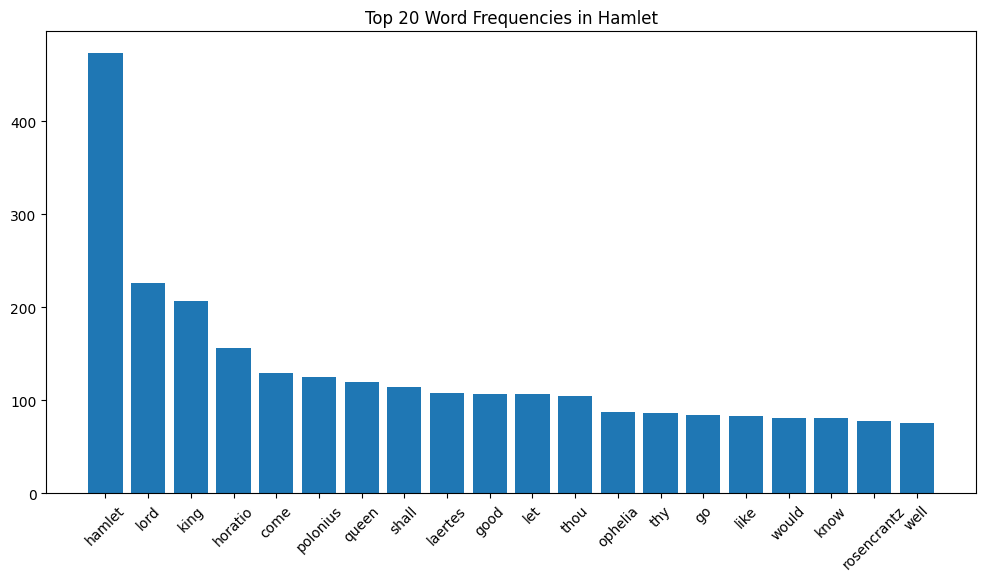

In [16]:
import matplotlib.pyplot as plt

words, counts = zip(*top20)
plt.figure(figsize=(12,6))
plt.bar(words, counts)
plt.title("Top 20 Word Frequencies in Hamlet")
plt.xticks(rotation=45)
plt.show()

## Load Mask Image for Word Cloud

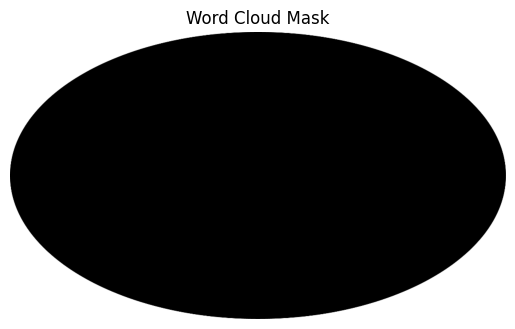

In [17]:
import imageio.v3 as imageio

image_file = "https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.imread(image_file)

plt.imshow(mask_image, cmap="gray")
plt.axis("off")
plt.title("Word Cloud Mask")
plt.show()

## Word Cloud

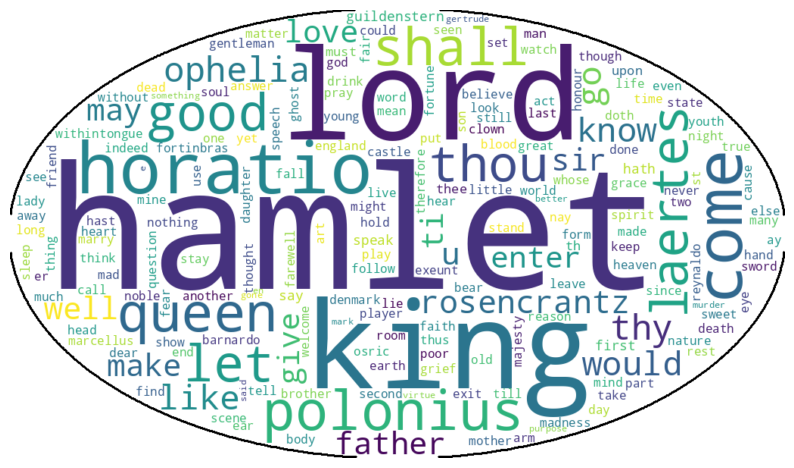

In [19]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    background_color="white",
    mask=mask_image,
    contour_width=2,
    contour_color="black"
).generate_from_frequencies(word_counts)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()